Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. 
После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. 
Цвет – центроид соответствующего кластера.

Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
a) Для отображения картинки воспользуйтесь вспомогательной функцией:

In [2]:
pip install opencv-python

     -------------------------------------- 38.1/38.1 MB 118.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [381]:
import matplotlib.pyplot as plt
import cv2
import skimage
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from skimage.metrics import structural_similarity as ssim
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

In [382]:
# ф-я для перестановки bgr в grb  
def bgr2rgb(image):
    b, g, r = cv2.split(image)
    return cv2.merge([r, g, b])
    
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

In [383]:

img = bgr2rgb(cv2.imread('alg_clast.jpg'))


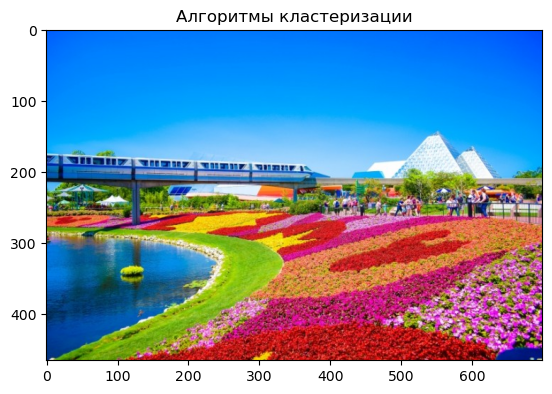

In [384]:
    plt.imshow(img)
    plt.title('Алгоритмы кластеризации')
    plt.show()

Реализуйте три модели кластеризации:
a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
b) DBSCAN
c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [385]:
img.shape

(466, 700, 3)

In [387]:
pix = img / 255.0
pix = pix.reshape(466 * 700, 3)
pix.shape

(326200, 3)

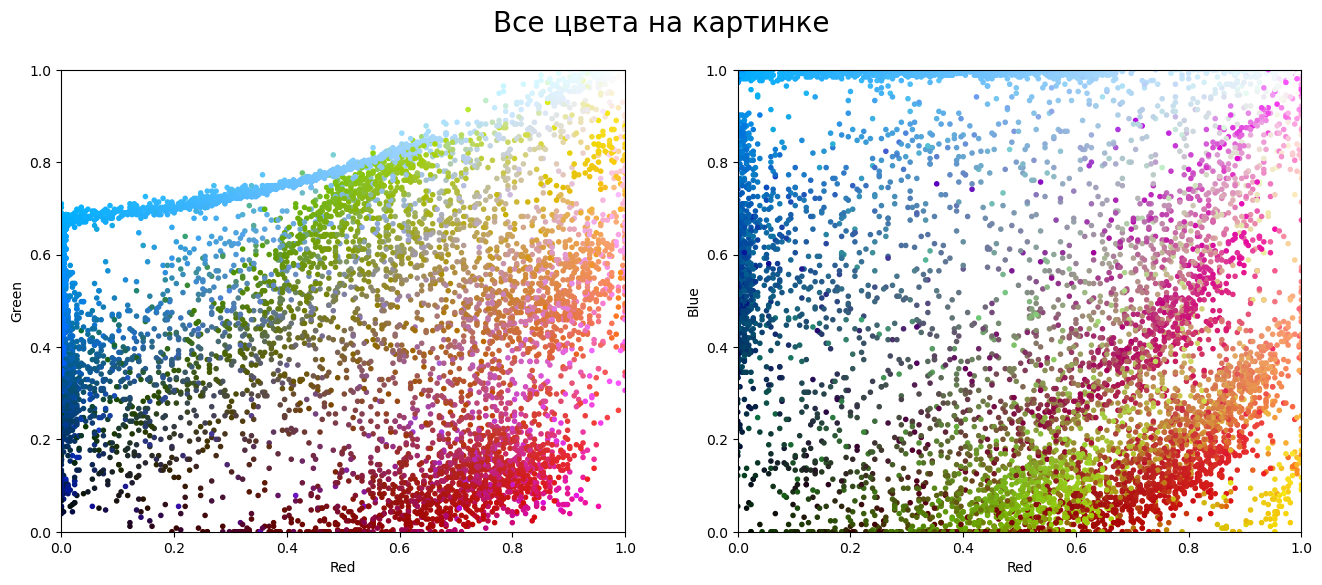

In [388]:
# визуализация 3D пространства цветовых пикселей в двух плоскостях (исследование)
plot_pixels(pix, title='Все цвета на картинке')

In [326]:
kmeans = KMeans(n_clusters=2, n_init=10).fit(pix)
new_colors = kmeans.cluster_centers_[kmeans.predict(pix)]

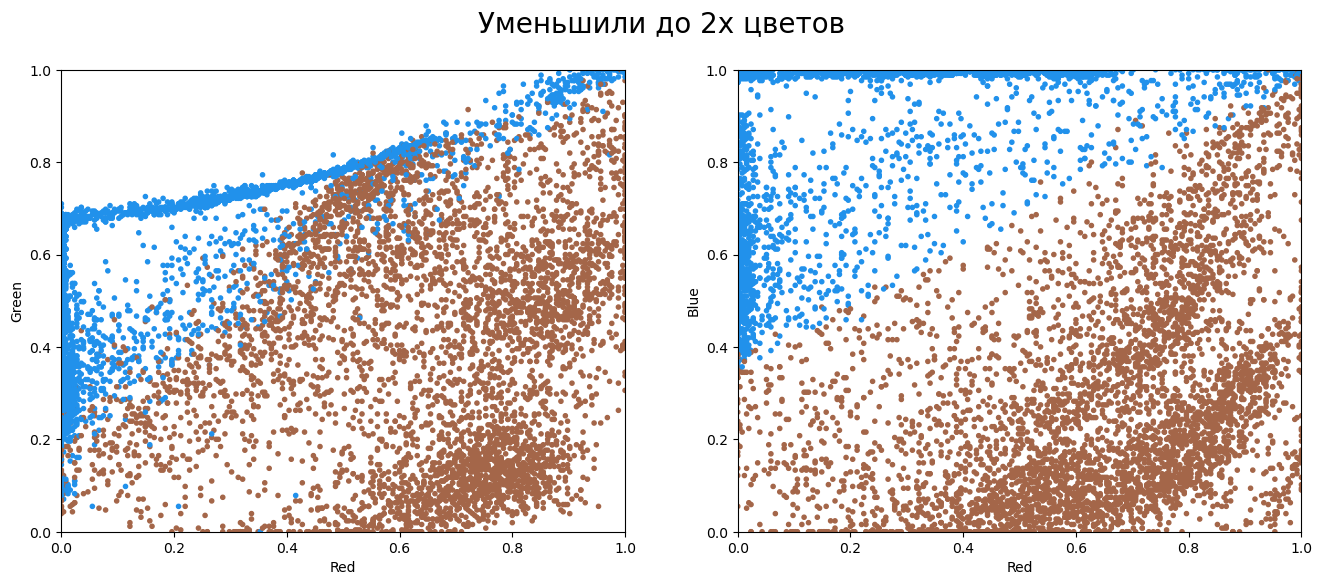

In [327]:
plot_pixels(pix, colors=new_colors, title='Уменьшили до 2х цветов')

In [389]:
#далее работаем со сжатым изображение 
img_ = cv2.resize(img, (128, 128))
img_.shape

(128, 128, 3)

In [390]:
pix_ = img_ / 255.0
pix_ = pix_.reshape(128 * 128, 3)
pix_.shape

(16384, 3)

C:\Users\Alexey\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\Alexey\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\Alexey\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\Alexey\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


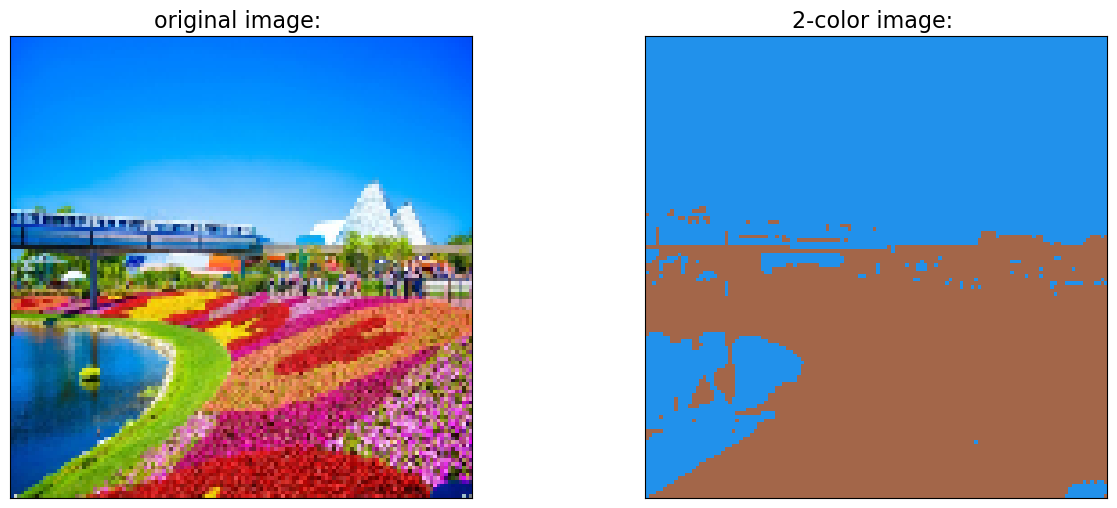

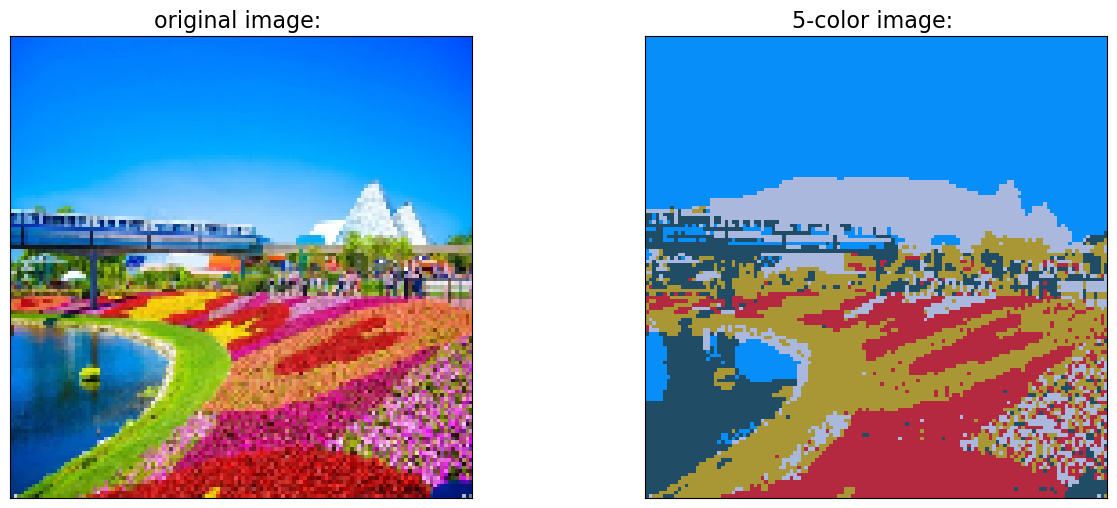

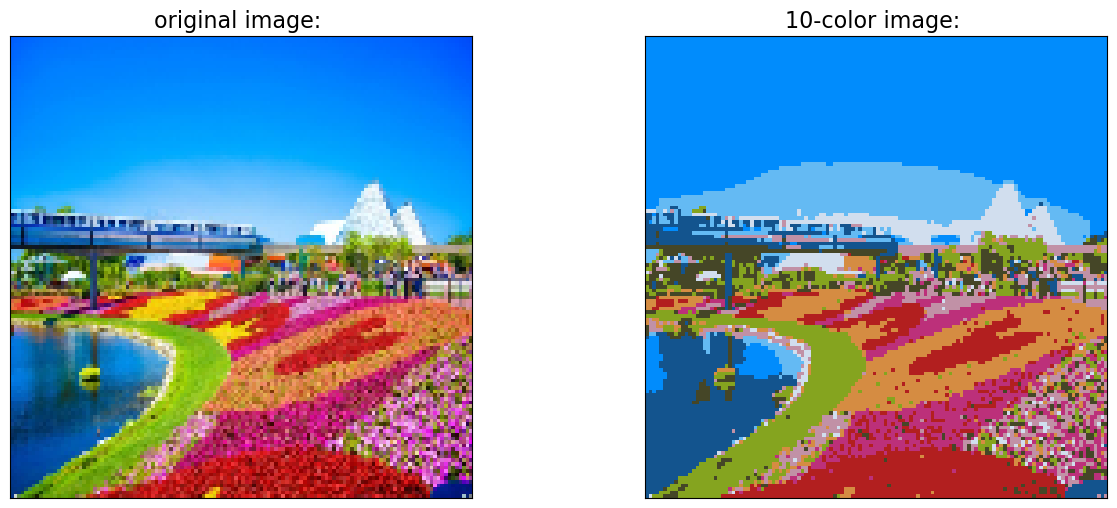

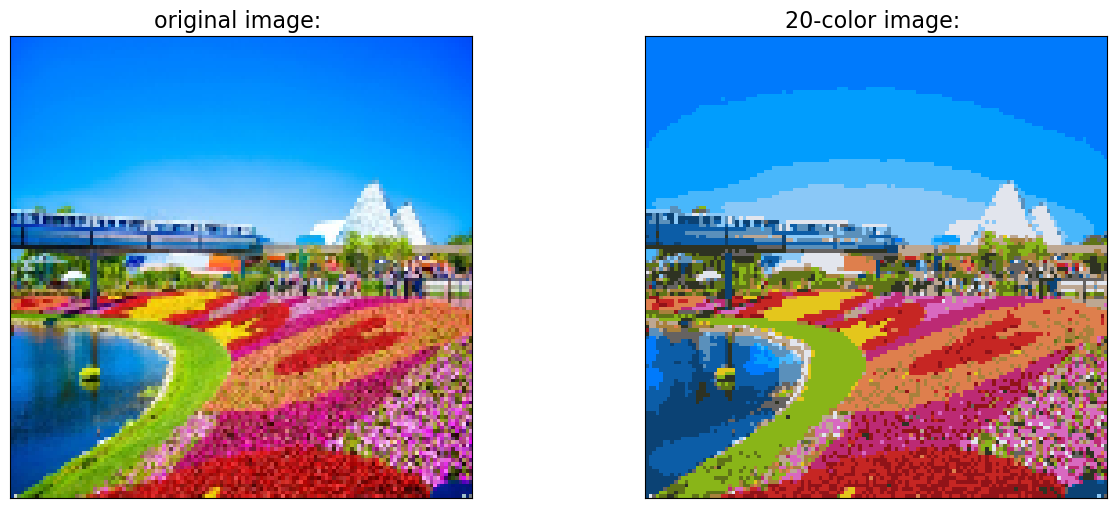

In [391]:
ssim_ = {}

for k in [2, 5, 10, 20]:
    kmeans = KMeans(n_clusters=k, n_init=10).fit(pix_)
    new_colors = kmeans.cluster_centers_[kmeans.predict(pix_)]
    
    img_recolored = new_colors.reshape(img_.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(img_)
    ax[0].set_title('original image: ', size=16)
    ax[1].imshow(img_recolored)
    ax[1].set_title(f'{k}-color image: ', size=16)
    ssim_[f'KMeans, K={k}'] = ssim(img_, img_recolored, channel_axis=2)
    

In [392]:
ssim_

{'KMeans, K=2': 0.0942417427524726,
 'KMeans, K=5': 0.0936090387151813,
 'KMeans, K=10': 0.09332579616242086,
 'KMeans, K=20': 0.09322547853585328}

b) DBSCAN

In [393]:
img_ = cv2.resize(img, (128, 128))

In [394]:
img_.shape

(128, 128, 3)

In [395]:
pix_ = img_ / 255.0
pix_ = pix_.reshape(128 * 128, 3)
pix_.shape

(16384, 3)

In [396]:
dbscan = DBSCAN(eps=0.05, min_samples=20)
dbscan.fit(pix_)

DBSCAN(eps=0.05, min_samples=20)

In [397]:
#get labels
labels = dbscan.labels_

#get number of clusters
no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
no_clusters



21

In [398]:
new_colors = pix_.copy()

for l in range(no_clusters):
    points_of_cluster = pix_[labels==l,:]
    centroid_of_cluster = np.mean(points_of_cluster, axis=0)
    new_colors[labels==l,:] = centroid_of_cluster

# заменим пропуски черными точками
new_colors[labels<0,:] = [0, 0, 0]

Text(0.5, 1.0, 'color image: ')

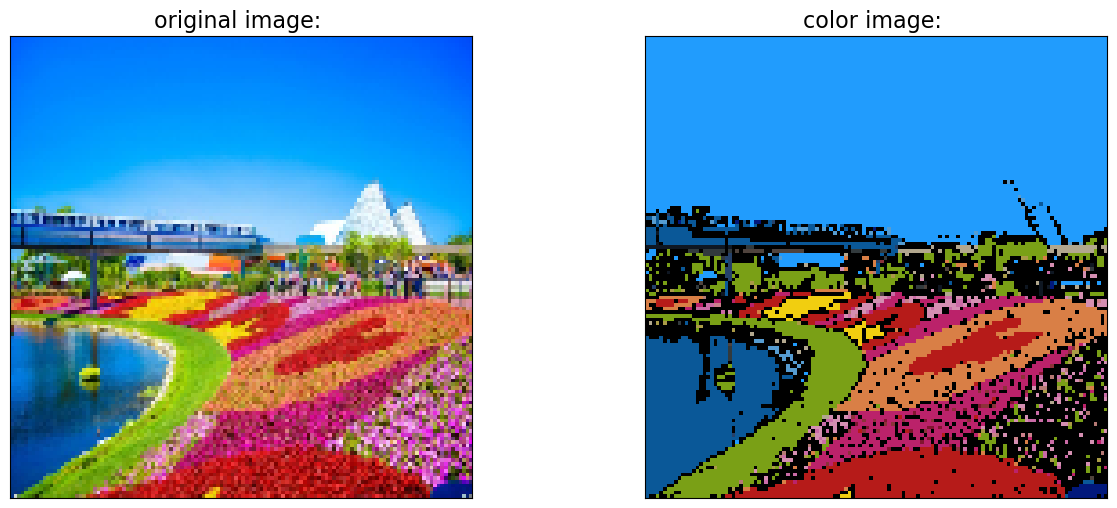

In [401]:
img_recolored = new_colors.reshape(img_.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_)
ax[0].set_title('original image: ', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('color image: ', size=16)


In [402]:
ssim_['DBSCAN'] = ssim(img_, img_recolored, channel_axis=2)

C:\Users\Alexey\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [403]:
ssim_

{'KMeans, K=2': 0.0942417427524726,
 'KMeans, K=5': 0.0936090387151813,
 'KMeans, K=10': 0.09332579616242086,
 'KMeans, K=20': 0.09322547853585328,
 'DBSCAN': 0.09375746021886383}

#c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [404]:
AC = AgglomerativeClustering(n_clusters=5).fit(pix_)
#new_colors = kmeans.cluster_centers_[kmeans.predict(pix)]


In [405]:
labels = AC.labels_
set(labels)

{0, 1, 2, 3, 4}

In [406]:
new_colors = pix_.copy()

for l in range(5):
    points_of_cluster = pix_[labels==l,:]
    centroid_of_cluster = np.mean(points_of_cluster, axis=0)
    new_colors[labels==l,:] = centroid_of_cluster
    print(f'{l} - {centroid_of_cluster} ')
#new_colors[labels<0,:] = [0, 0, 0]


0 - [0.57081772 0.68889733 0.8560037 ] 
1 - [0.18271896 0.31306472 0.37548314] 
2 - [0.00181401 0.54452242 0.98998968] 
3 - [0.69280288 0.61012996 0.19096947] 
4 - [0.71466291 0.15446747 0.24300516] 


C:\Users\Alexey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alexey\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Alexey\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\Alexey\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\Alexey\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\Alexey\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Settin

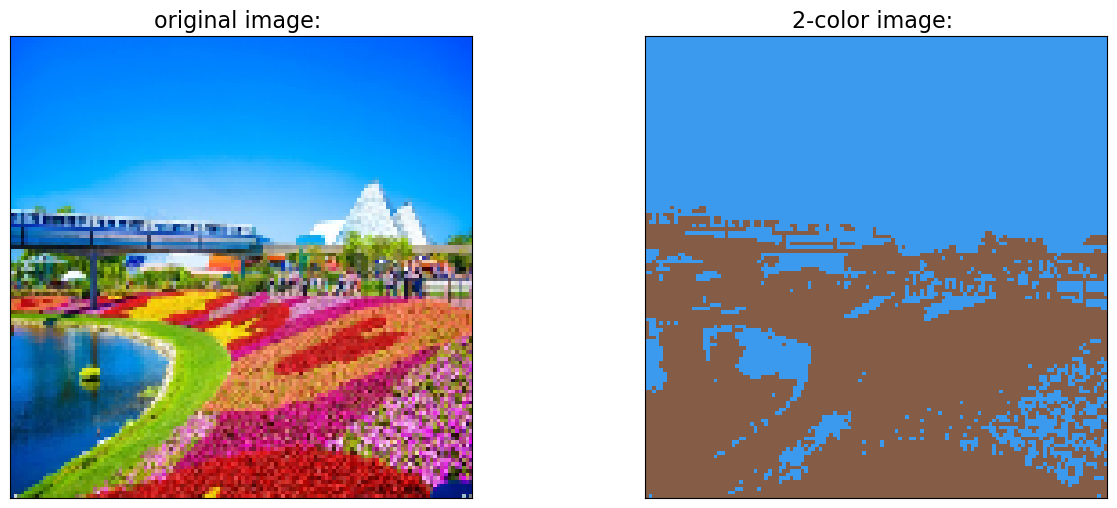

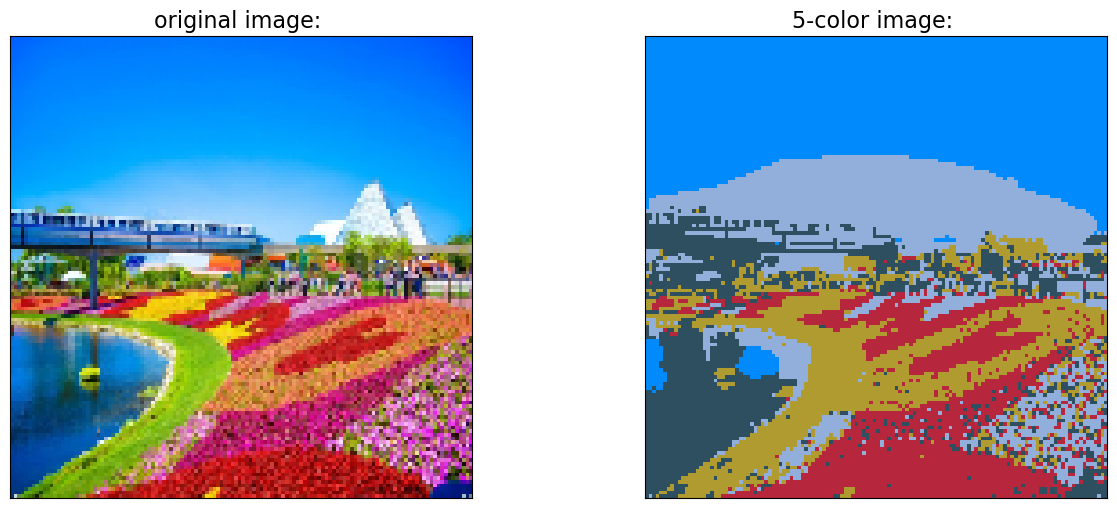

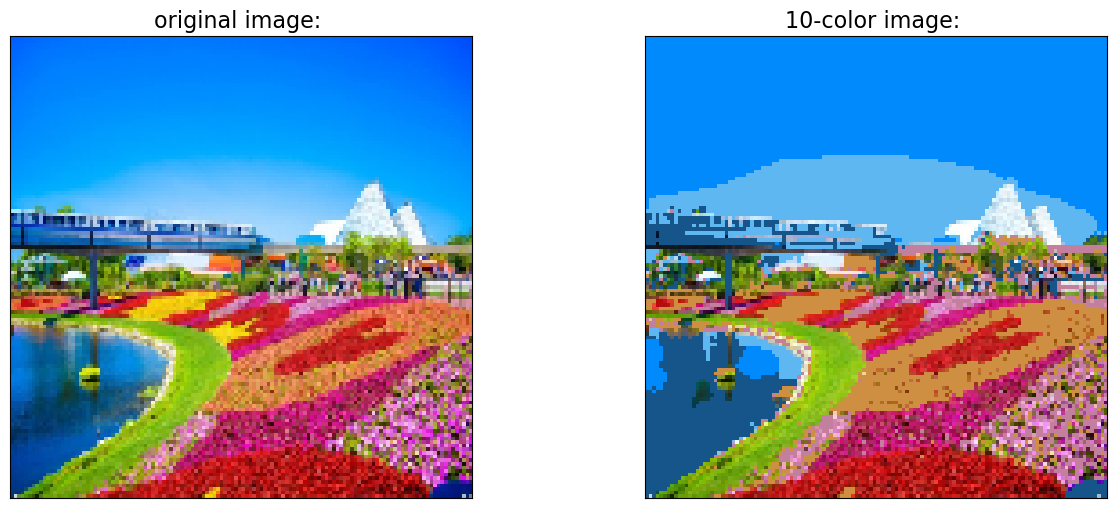

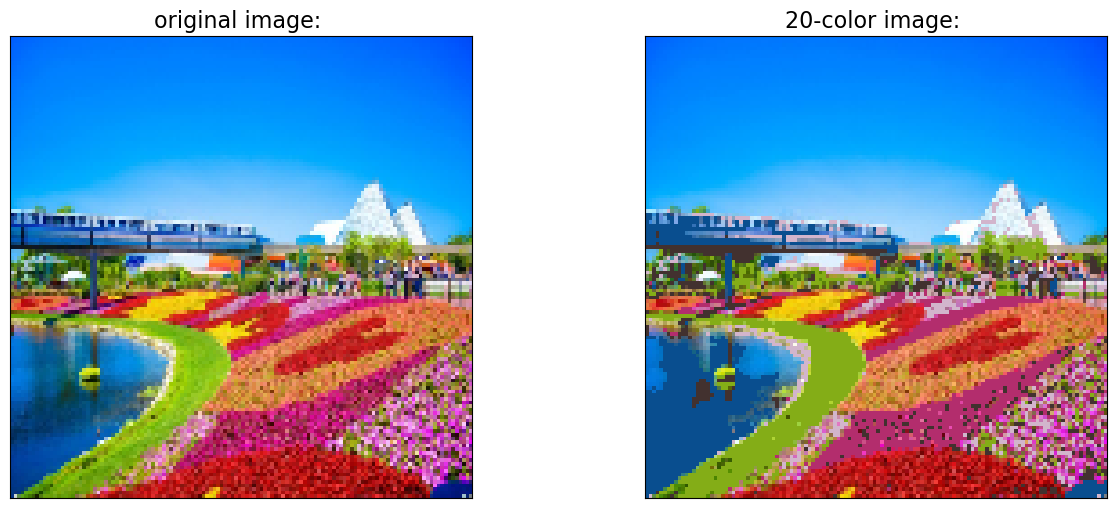

In [379]:

for k in [2, 5, 10, 20]:
    AC = AgglomerativeClustering(n_clusters=k).fit(pix_)
    labels = AC.labels_
    new_colors = pix_.copy()
    
    for l in range(5):
        points_of_cluster = pix_[labels==l,:]
        centroid_of_cluster = np.mean(points_of_cluster, axis=0)
        new_colors[labels==l,:] = centroid_of_cluster

    img_recolored = new_colors.reshape(img_.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(img_)
    ax[0].set_title('original image: ', size=16)
    ax[1].imshow(img_recolored)
    ax[1].set_title(f'{k}-color image: ', size=16)
    ssim_[f'Agglomerative, K={k}'] = ssim(img_, img_recolored, channel_axis=2)
    
#new_colors[labels<0,:] = [0, 0, 0]

In [380]:
ssim_


{'KMeans, K=2': 0.09424246418651012,
 'KMeans, K=5': 0.09361174948556866,
 'KMeans, K=10': 0.09332574767941072,
 'KMeans, K=20': 0.09322139552852525,
 'DBSCAN': 0.09375746021886383,
 'Agglomerative, K=2': 0.09538532836829294,
 'Agglomerative, K=5': 0.09367395040215942,
 'Agglomerative, K=10': 0.09334889573552589,
 'Agglomerative, K=20': 0.09319714025599413}

# KMeans рабоет побыстрее, Agglomerative - адекватнее, DBSCAN - надо тщательно подбирать настройки